In [12]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


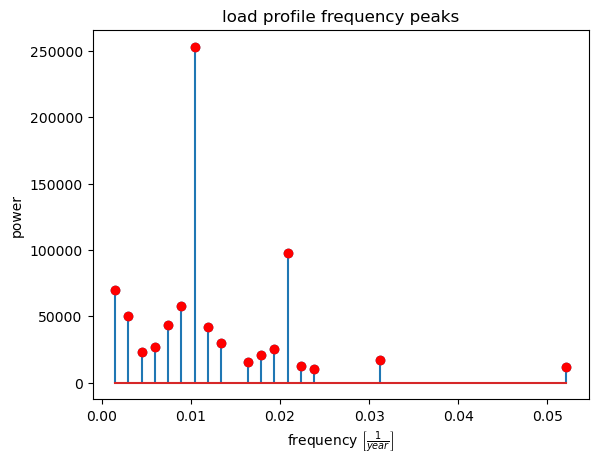

(35040, 46)


,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,day_of_week,day_of_year,weekend,...,cos_730_py,sin_782_py,cos_782_py,sin_834_py,cos_834_py,sin_1095_py,cos_1095_py,sin_1824_py,cos_1824_py,out.electricity.total.energy_consumption
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,0,1,0,0,0,0,0,0,1,0,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,8.267236
2018-01-01 00:30:00,0,1,0,0,0,0,0,0,1,0,...,0.999963,0.008035,0.999968,0.007534,0.999972,0.005738,0.999984,0.003443,0.999994,8.269804
2018-01-01 00:45:00,0,1,0,0,0,0,0,0,1,0,...,0.999852,0.016069,0.999871,0.015067,0.999886,0.011476,0.999934,0.006886,0.999976,8.271807
2018-01-01 01:00:00,0,1,0,0,0,0,0,0,1,0,...,0.999667,0.024102,0.999710,0.022599,0.999745,0.017213,0.999852,0.010328,0.999947,8.272570
2018-01-01 01:15:00,0,1,0,0,0,0,0,0,1,0,...,0.999407,0.032134,0.999484,0.030131,0.999546,0.022950,0.999737,0.013771,0.999905,8.266240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,0,1,0,0,0,0,0,0,365,0,...,0.999074,-0.947520,0.319695,0.052712,0.998610,-0.028686,0.999588,0.945596,0.325342,8.383031
2018-12-31 23:15:00,0,1,0,0,0,0,0,0,365,0,...,0.999407,-0.944921,0.327298,0.060234,0.998184,-0.022950,0.999737,0.946711,0.322085,8.383271
2018-12-31 23:30:00,0,1,0,0,0,0,0,0,365,0,...,0.999667,-0.942261,0.334880,0.067752,0.997702,-0.017213,0.999852,0.947814,0.318823,8.379638


In [13]:
# load data into dataframe
from utils import get_peak_frequencies, engineer_features
bldg_221122 = pd.read_parquet("./data/221122-0.parquet").set_index('timestamp')
load_profile = pd.DataFrame(bldg_221122['out.electricity.total.energy_consumption'])
peak_freqs = get_peak_frequencies(load_profile, show_plot=True)
df = engineer_features(load_profile, peak_freqs)
print(df.shape)
df



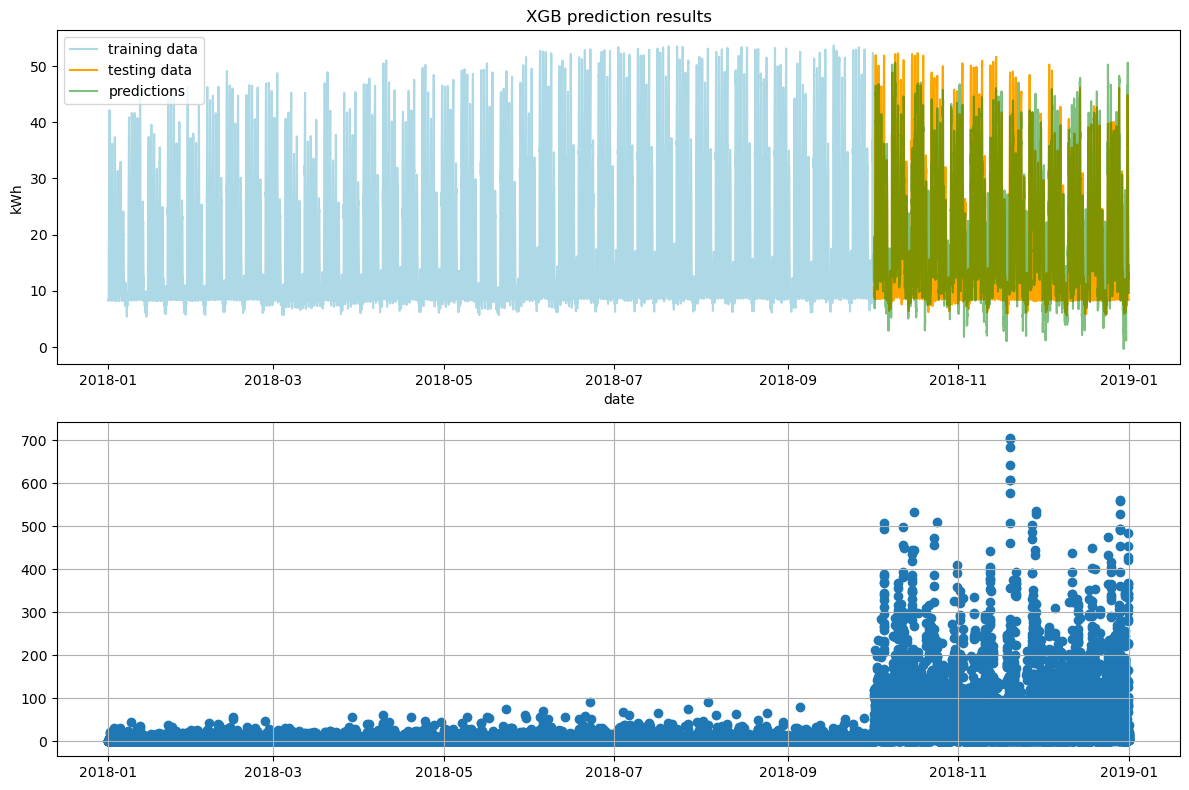

Sum of squared error (test set): 525477.7799939595


In [9]:


X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
train_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 50, 'alpha': 3}

# cv_results = xgb.cv(dtrain=train_dmatrix, params=params, nfold=500,verbose_eval=100,
#                     num_boost_round=50,early_stopping_rounds=50,metrics="rmse", as_pandas=True, seed=123)
# reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.01,
#                 max_depth = 250, alpha = 1, n_estimators = 1000, eval_metric='rmse', gamma=100
                
#                 )

reg = xgb.XGBRegressor(objective ='reg:squarederror')

reg.fit(X_train, y_train)
# cv_results
# from Vladimir@stackoverflow: https://stackoverflow.com/questions/66681443/how-can-i-get-the-trained-model-from-xgboost-cv
# class SaveBestModel(xgb.callback.TrainingCallback):
#     def __init__(self, cvboosters):
#         self._cvboosters = cvboosters
    
#     def after_training(self, model):
#         self._cvboosters[:] = [cvpack.bst for cvpack in model.cvfolds]
#         return model
# cv_boosters = []

# cv_results = xgb.cv(dtrain=train_dmatrix, params=params, nfold=100,
#                     num_boost_round=250, early_stopping_rounds=50, 
#                     metrics="rmse", as_pandas=True, seed=0,
#                     callbacks=[SaveBestModel(cv_boosters), verbose_eval=100])
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
preds_os = reg.predict(X_test)
preds_is = reg.predict(X_train)
preds_total = reg.predict(X)
preds = pd.DataFrame(preds_os, index=y_test.index)
ax[0].plot(y_train, color='lightblue', label='training data')
ax[0].plot(y_test, color='orange', label='testing data')
ax[0].plot(preds, color='green', alpha = 0.5, label='predictions')
ax[0].set_title('XGB prediction results')
ax[0].set_xlabel('date')
ax[0].set_ylabel('kWh')
ax[0].legend()
squared_residuals = np.abs(preds_total - y)**2
ax[1].scatter(y.index, squared_residuals, label = "squared residuals")
plt.grid()
plt.tight_layout()
plt.show()
print(f"Sum of squared error (test set): {np.sum(squared_residuals)}")



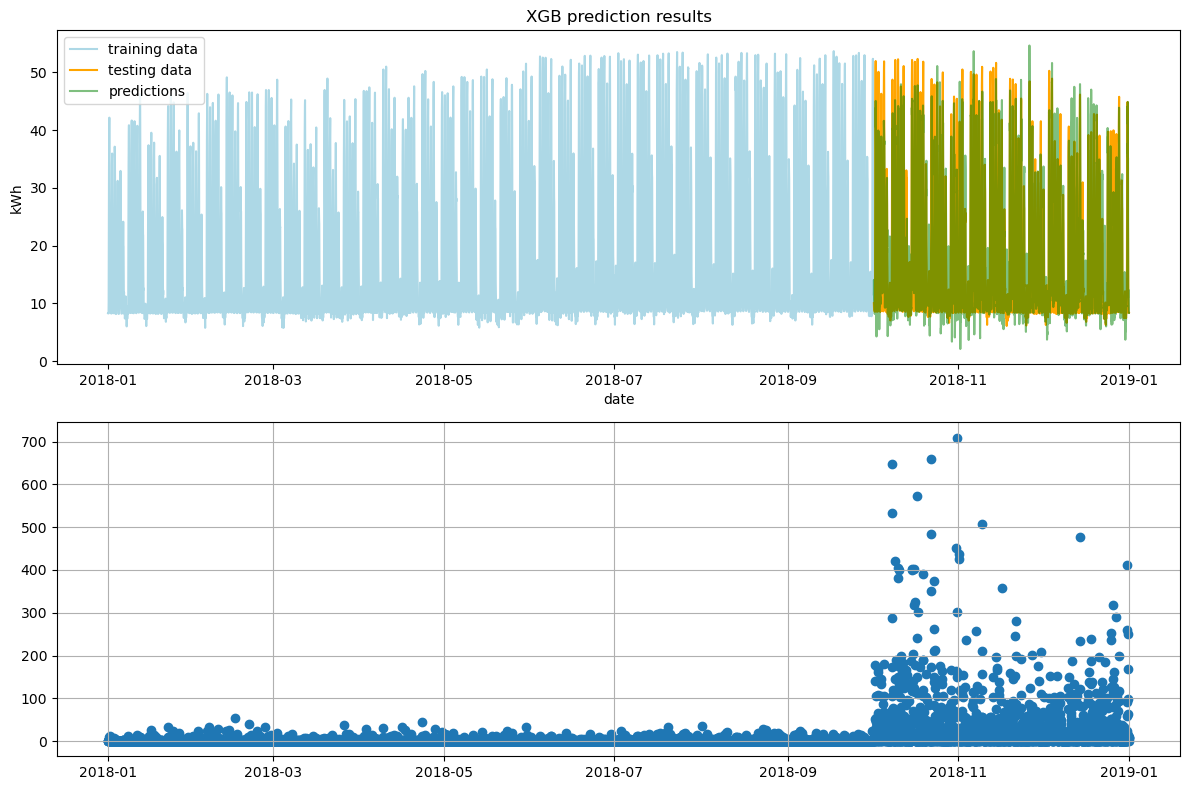

Sum of squared error (test set): 72433.87770063194


,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,day_of_week,day_of_year,weekend,...,cos_730_py,sin_782_py,cos_782_py,sin_834_py,cos_834_py,sin_1095_py,cos_1095_py,sin_1824_py,cos_1824_py,out.electricity.total.energy_consumption
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,0,1,0,0,0,0,0,0,1,0,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,8.267236
2018-01-01 00:30:00,0,1,0,0,0,0,0,0,1,0,...,0.999963,0.008035,0.999968,0.007534,0.999972,0.005738,0.999984,0.003443,0.999994,8.269804
2018-01-01 00:45:00,0,1,0,0,0,0,0,0,1,0,...,0.999852,0.016069,0.999871,0.015067,0.999886,0.011476,0.999934,0.006886,0.999976,8.271807
2018-01-01 01:00:00,0,1,0,0,0,0,0,0,1,0,...,0.999667,0.024102,0.999710,0.022599,0.999745,0.017213,0.999852,0.010328,0.999947,8.272570
2018-01-01 01:15:00,0,1,0,0,0,0,0,0,1,0,...,0.999407,0.032134,0.999484,0.030131,0.999546,0.022950,0.999737,0.013771,0.999905,8.266240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,0,1,0,0,0,0,0,0,365,0,...,0.999074,-0.947520,0.319695,0.052712,0.998610,-0.028686,0.999588,0.945596,0.325342,8.383031
2018-12-31 23:15:00,0,1,0,0,0,0,0,0,365,0,...,0.999407,-0.944921,0.327298,0.060234,0.998184,-0.022950,0.999737,0.946711,0.322085,8.383271
2018-12-31 23:30:00,0,1,0,0,0,0,0,0,365,0,...,0.999667,-0.942261,0.334880,0.067752,0.997702,-0.017213,0.999852,0.947814,0.318823,8.379638


In [10]:
# add weather
weather = pd.read_csv('data/G1200860_2018.csv', parse_dates=[0])
weather = weather.rename(columns={'date_time':'timestamp'}).set_index('timestamp')
df2 = weather.join(df, how='left')
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
reg = xgb.XGBRegressor(objective ='reg:squarederror')
reg.fit(X_train.values, y_train.values)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
preds_os = reg.predict(X_test)
preds_is = reg.predict(X_train)
preds_total = reg.predict(X)
preds = pd.DataFrame(preds_os, index=y_test.index)
ax[0].plot(y_train, color='lightblue', label='training data')
ax[0].plot(y_test, color='orange', label='testing data')
ax[0].plot(preds, color='green', alpha = 0.5, label='predictions')
ax[0].set_title('XGB prediction results')
ax[0].set_xlabel('date')
ax[0].set_ylabel('kWh')
ax[0].legend()
squared_residuals = np.abs(preds_total - y)**2
ax[1].scatter(y.index, squared_residuals, label = "squared residuals")
plt.grid()
plt.tight_layout()
plt.show()
print(f"Sum of squared error (test set): {np.sum(squared_residuals)}")
df



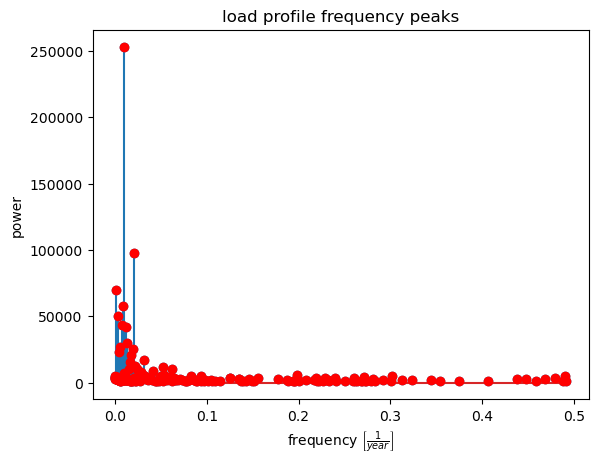

/Users/tim/Desktop/load profile data/utils.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'cos_{int(freq * df.shape[0])}_py'] = np.array(np.cos( (2 * np.pi)/N * obs_num / freq))
/Users/tim/Desktop/load profile data/utils.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'sin_{int(freq * df.shape[0])}_py'] = np.array(np.sin( (2 * np.pi)/N * obs_num / freq))
/Users/tim/Desktop/load profile data/utils.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

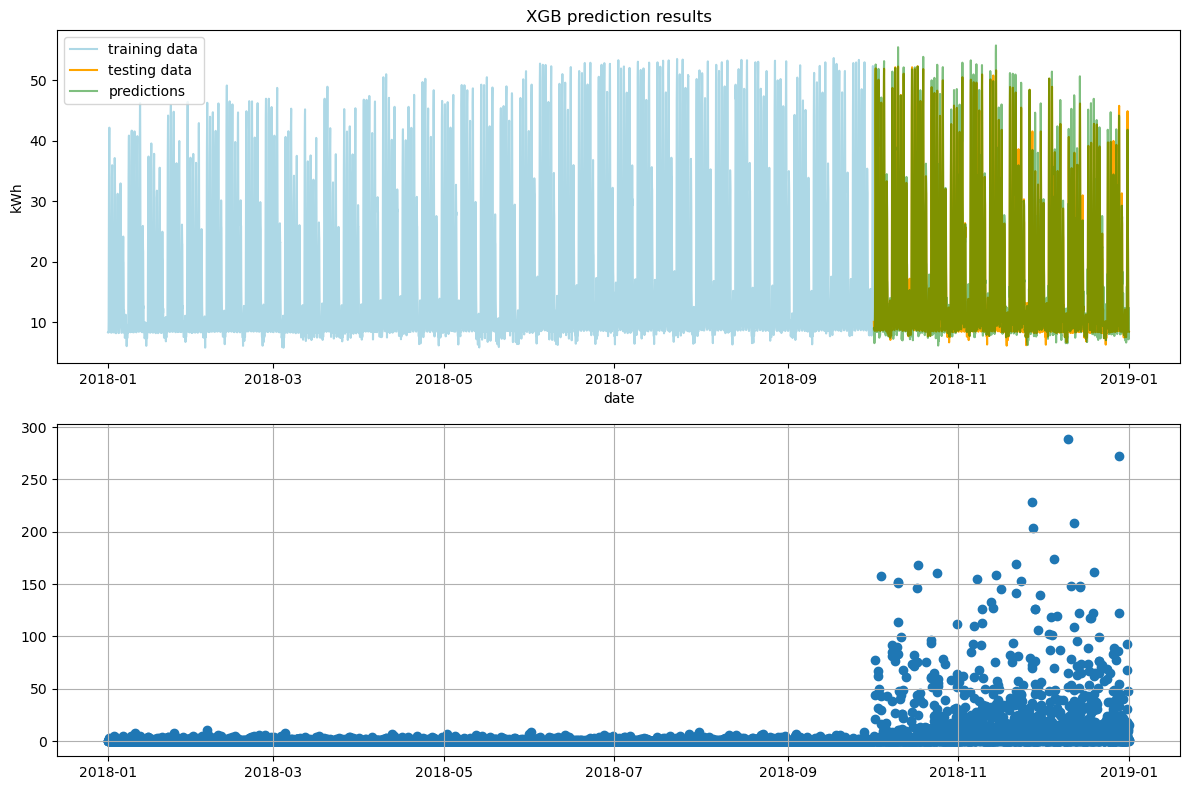

Sum of squared error (test set): 28269.737446822353


In [11]:
bldg_221122 = pd.read_parquet("./data/221122-0.parquet").set_index('timestamp')
load_profile = pd.DataFrame(bldg_221122['out.electricity.total.energy_consumption'])
peak_freqs = get_peak_frequencies(load_profile, peak_prominence=10**3, show_plot=True)
df = engineer_features(load_profile, peak_freqs)
weather = pd.read_csv('data/G1200860_2018.csv', parse_dates=[0])
weather = weather.rename(columns={'date_time':'timestamp'}).set_index('timestamp')
df2 = weather.join(df, how='left')
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
reg = xgb.XGBRegressor(objective ='reg:squarederror')
reg.fit(X_train.values, y_train.values)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
preds_os = reg.predict(X_test)
preds_is = reg.predict(X_train)
preds_total = reg.predict(X)
preds = pd.DataFrame(preds_os, index=y_test.index)
ax[0].plot(y_train, color='lightblue', label='training data')
ax[0].plot(y_test, color='orange', label='testing data')
ax[0].plot(preds, color='green', alpha = 0.5, label='predictions')
ax[0].set_title('XGB prediction results')
ax[0].set_xlabel('date')
ax[0].set_ylabel('kWh')
ax[0].legend()
squared_residuals = np.abs(preds_total - y)**2
ax[1].scatter(y.index, squared_residuals, label = "squared residuals")
plt.grid()
plt.tight_layout()
plt.show()
print(f"Sum of squared error (test set): {np.sum(squared_residuals)}")

In [6]:
# find a building to use
# metadata[metadata[('in.climate_zone_ashrae_2004' == "1A") & ('in.building_type' == "Outpatient")]]
metadata[(metadata['in.climate_zone_ashrae_2004'] == "1A")]
metadata[(metadata['in.building_type'] == "Outpatient")]
inpatient_metadata = metadata[(metadata['in.climate_zone_ashrae_2004'] == "1A") & (metadata['in.building_type'] == "Outpatient")].reset_index()

inpatient_metadata[inpatient_metadata['bldg_id'] == 221122].T

NameError: name 'metadata' is not defined

In [196]:
bldg_221122 = pd.read_parquet("./data/221122-0.parquet").set_index('timestamp')
load_profile = bldg_221122['out.electricity.total.energy_consumption']


def get_peak_frequencies(df:pd.DataFrame, show_plot=False):
    xt = df.index
    yt = df.values
    fft_output = fft(yt)
    power = np.abs(fft_output)
    freqs = fftfreq(len(fft_output))

    peaks = find_peaks(power[freqs >=0], prominence=10**4)[0] # get most prominent frequencies
    peak_freqs =  freqs[peaks]
    peak_power = power[peaks]
    if show_plot == True:
        plt.stem(peak_freqs, peak_power)
        plt.plot(peak_freqs, peak_power, 'ro')
        plt.title("load profile frequency peaks")
        plt.xlabel("frequency $\left[ \\frac{1}{year} \\right]$")
        plt.ylabel("power")
        plt.show()
    return peak_freqs

def engineer_features(df:pd.DataFrame, peak_freqs:np.array=np.array([])):
    df = df.copy()
    if type(df.index != np.datetime64):
        print("shits fucked")
        df.index = pd.to_datetime(df.index)
        print(df.index[0])
    df['day_names'] = df.index.day_name()
    df = df.join(pd.get_dummies(df.index.day_name()).set_index(df.index))

    df['day_of_week'] = df.index.day_of_week
    df['day_of_year'] = df.index.day_of_year
    df['weekend'] = df['day_names'].apply(lambda x: x in ["Saturday", "Sunday"])
    
    cal = calendar()
    sd = df.index.min().date()
    ed = df.index.max().date()
    holidays = cal.holidays(start = sd, end = ed)
    df['is_holiday'] = pd.to_datetime(load_profile.index.date).isin(holidays)

    obs_num = df.reset_index().index

    for freq in peak_freqs:
        df[f'sin_{int(freq * df.shape[0])}_py'] = np.array(np.sin( 1 / df.shape[0] * 2 * np.pi * obs_num* freq))
        df[f'cos_{int(freq * df.shape[0])}_py'] = np.array(np.cos( 1 / df.shape[0] * 2 * np.pi * obs_num * freq))

    cols = [colname for colname in df.columns.tolist() if colname != "day_names"]
    
    return df[cols[1:] + cols[:1]]
# engineer_features(pd.DataFrame(load_profile), peak_freq)



array([  52.,  104.,  156.,  209.,  261.,  313.,  365.,  417.,  469.,
        574.,  626.,  678.,  730.,  782.,  834., 1095., 1825.])

In [186]:
df = pd.DataFrame(load_profile)
if type(df.index != np.datetime64):
    print("shits fucked")
    df.index = pd.to_datetime(df.index)
    print(df.index[0])
df['day_names'] = df.index.day_name()
df
# pd.merge(pd.get_dummies(df.index.day_name()).set_index(df.index), df)
df.join(pd.get_dummies(df.index.day_name()).set_index(df.index))

shits fucked
2018-01-01 00:15:00


,out.electricity.total.energy_consumption,day_names,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
timestamp,,,,,,,,,
2018-01-01 00:15:00,8.267236,Monday,0,1,0,0,0,0,0
2018-01-01 00:30:00,8.269804,Monday,0,1,0,0,0,0,0
2018-01-01 00:45:00,8.271807,Monday,0,1,0,0,0,0,0
2018-01-01 01:00:00,8.272570,Monday,0,1,0,0,0,0,0
2018-01-01 01:15:00,8.266240,Monday,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,8.383031,Monday,0,1,0,0,0,0,0
2018-12-31 23:15:00,8.383271,Monday,0,1,0,0,0,0,0
2018-12-31 23:30:00,8.379638,Monday,0,1,0,0,0,0,0


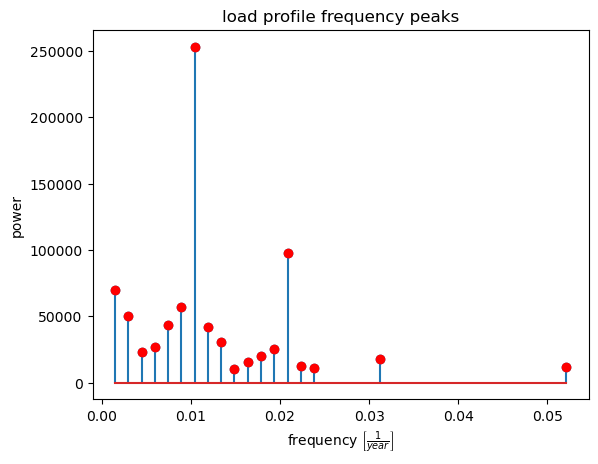

In [86]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks



xt = load_profile.index[:-1]
yt = load_profile.values[:-1]
fft_output = fft(yt)
power = np.abs(fft_output)
freqs = fftfreq(len(fft_output))

peaks = find_peaks(power[freqs >=0], prominence=10**4)[0] # get most prominent frequencies
peak_freq =  freqs[peaks]
peak_power = power[peaks]
plt.stem(peak_freq, peak_power)
plt.plot(peak_freq, peak_power, 'ro')
plt.title("load profile frequency peaks")
plt.xlabel("frequency $\left[ \\frac{1}{year} \\right]$")
plt.ylabel("power")
plt.show()

In [115]:
df = pd.DataFrame(load_profile)
obs_num = df.reset_index().index
np.array(np.sin( 1 / df.shape[0] * 2 * np.pi * obs_num))

array([ 0.        ,  0.00017931,  0.00035863, ..., -0.00053794,
       -0.00035863, -0.00017931])

In [179]:
pd.get_dummies(pd.DataFrame(load_profile).index.day_name()).set_index(df.index)



,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
timestamp,,,,,,,
2018-01-01 00:15:00,0,1,0,0,0,0,0
2018-01-01 00:30:00,0,1,0,0,0,0,0
2018-01-01 00:45:00,0,1,0,0,0,0,0
2018-01-01 01:00:00,0,1,0,0,0,0,0
2018-01-01 01:15:00,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
2018-12-31 23:00:00,0,1,0,0,0,0,0
2018-12-31 23:15:00,0,1,0,0,0,0,0
2018-12-31 23:30:00,0,1,0,0,0,0,0


In [60]:
pd.to_datetime(load_profile.index.date).isin(holidays)

array([ True,  True,  True, ..., False, False, False])